# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Base info
x=1
count=1
city_df=[]
lat=[] 
long=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]


url= f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="
city_responses= [ ]

#Beggining Print
print("Data Retrieval Initiated")
print("________________________")

#for loop to make a api request for each city. 
for city in cities:
    if x >= 51: 
        count+= 1
        x=1
    try:
        city_data=requests.get(url + city).json()
        city_df.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        Max_Temp.append(city_data['main']['temp_max'])
        Humidity.append(city_data['main']["humidity"])
        Cloudiness.append(city_data["clouds"]['all'])
        Wind_Speed.append(city_data["wind"]['speed'])
        Country.append(city_data['sys']['country'])
        Date.append(city_data['dt'])
        city_responses.append(city_data)
        print(f"Processing Record {x} of set {count}|{city}")
        x+=1
    except: 
        print("City not found, Moving on... ")
        
#Final Print
print("________________________")
print("Data Retrieval Completed")
print("________________________")

Data Retrieval Initiated
________________________
Processing Record 1 of set 1|rikitea
Processing Record 2 of set 1|hobart
Processing Record 3 of set 1|tiksi
Processing Record 4 of set 1|quatre cocos
Processing Record 5 of set 1|busselton
Processing Record 6 of set 1|lanzhou
Processing Record 7 of set 1|mahebourg
Processing Record 8 of set 1|bow island
Processing Record 9 of set 1|sorong
City not found, Moving on... 
Processing Record 10 of set 1|port alfred
Processing Record 11 of set 1|bethel
Processing Record 12 of set 1|hilo
Processing Record 13 of set 1|port lincoln
Processing Record 14 of set 1|hobyo
Processing Record 15 of set 1|tasiilaq
Processing Record 16 of set 1|port elizabeth
Processing Record 17 of set 1|omboue
Processing Record 18 of set 1|lorengau
Processing Record 19 of set 1|castro
Processing Record 20 of set 1|sao joao da barra
Processing Record 21 of set 1|vaini
Processing Record 22 of set 1|saint-joseph
Processing Record 23 of set 1|yadgir
Processing Record 24 of s

Processing Record 44 of set 4|saint anthony
Processing Record 45 of set 4|bandarbeyla
Processing Record 46 of set 4|lebu
Processing Record 47 of set 4|geraldton
Processing Record 48 of set 4|zemio
Processing Record 49 of set 4|la seyne-sur-mer
Processing Record 50 of set 4|tulua
Processing Record 1 of set 5|nouadhibou
Processing Record 2 of set 5|boda
Processing Record 3 of set 5|kijang
Processing Record 4 of set 5|georgetown
Processing Record 5 of set 5|klaksvik
City not found, Moving on... 
Processing Record 6 of set 5|meulaboh
Processing Record 7 of set 5|tuatapere
Processing Record 8 of set 5|codrington
City not found, Moving on... 
Processing Record 9 of set 5|fortuna
Processing Record 10 of set 5|victoria
Processing Record 11 of set 5|hamilton
Processing Record 12 of set 5|nieuwpoort
Processing Record 13 of set 5|khatanga
Processing Record 14 of set 5|grand-santi
Processing Record 15 of set 5|gazli
Processing Record 16 of set 5|rafaela
Processing Record 17 of set 5|osoyoos
Proces

Processing Record 43 of set 8|flagstaff
Processing Record 44 of set 8|cabo san lucas
Processing Record 45 of set 8|ahipara
Processing Record 46 of set 8|portland
Processing Record 47 of set 8|ilebo
Processing Record 48 of set 8|vila franca do campo
Processing Record 49 of set 8|zeya
Processing Record 50 of set 8|yala
Processing Record 1 of set 9|lavrentiya
Processing Record 2 of set 9|gat
City not found, Moving on... 
Processing Record 3 of set 9|hailar
Processing Record 4 of set 9|hefei
Processing Record 5 of set 9|dudinka
Processing Record 6 of set 9|vanavara
Processing Record 7 of set 9|naifaru
Processing Record 8 of set 9|santana do livramento
Processing Record 9 of set 9|bethanien
Processing Record 10 of set 9|boyolangu
Processing Record 11 of set 9|chumikan
Processing Record 12 of set 9|taoudenni
Processing Record 13 of set 9|kangasala
Processing Record 14 of set 9|sayyan
Processing Record 15 of set 9|dalvik
City not found, Moving on... 
City not found, Moving on... 
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Make into a DataFrame
city_df=pd.DataFrame({"City": city_df, "Lat": lat, "Lng": long, 
                      "Max Temp": Max_Temp, "Humidity": Humidity, 
                      "Cloudiness":Cloudiness, "Wind Speed": Wind_Speed,
                     "Country": Country, "Date": Date})

city_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,70.30,79,36,11.68,PF,1596689410
1,Hobart,-42.88,147.33,53.01,57,75,13.87,AU,1596689384
2,Tiksi,71.69,128.87,53.87,88,100,3.96,RU,1596689465
3,Quatre Cocos,-20.21,57.76,71.01,56,75,10.29,MU,1596689504
4,Busselton,-33.65,115.33,60.01,44,5,7.96,AU,1596689412


In [6]:
#show df
city_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_df["Humidity"].max()

city_df=city_df[city_df["Humidity"]<= 100]

city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.550954,19.438286,69.228587,70.257951,47.593640,7.992261,1.596690e+09
std,33.591015,92.266314,13.636036,20.464359,38.683159,5.235501,1.694833e+02
min,-54.800000,-179.170000,31.170000,3.000000,0.000000,0.090000,1.596689e+09
25%,-7.380000,-65.507500,59.392500,58.000000,3.000000,4.012500,1.596689e+09
50%,24.115000,25.985000,69.845000,74.000000,40.000000,6.930000,1.596690e+09
75%,49.502500,102.277500,80.385000,86.000000,90.000000,10.637500,1.596690e+09
max,78.220000,179.320000,99.000000,100.000000,100.000000,33.890000,1.596690e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

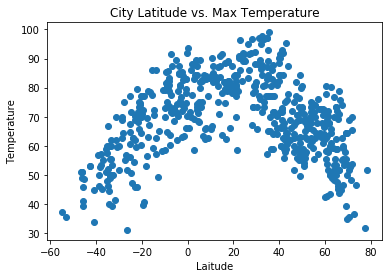

In [11]:
# Create Latitude vs. Temperature scatter plot
plt.scatter(city_df["Lat"], city_df["Max Temp"])

# Set labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Temperature")

# Save .png
plt.savefig("../Images/City Latitude vs Temperature.png")

## Latitude vs. Humidity Plot

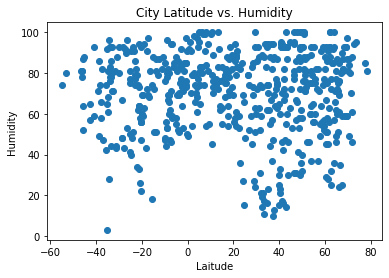

In [12]:
# Create Latitude vs. Humidity scatter plot
plt.scatter(city_df["Lat"], city_df["Humidity"])

# Set labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity")

# Save .png
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

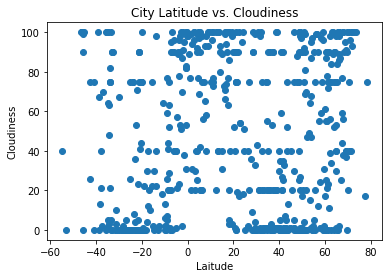

In [13]:
# Create Latitude vs. Cloudiness scatter plot
plt.scatter(city_df["Lat"], city_df["Cloudiness"])

# Set labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness")

# Save .png
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

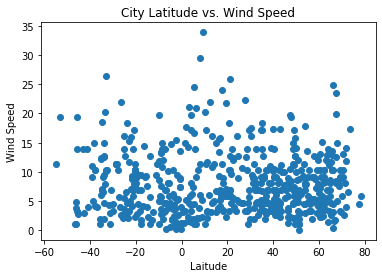

In [14]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(city_df["Lat"], city_df["Wind Speed"])

#Set labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed")

# Save .png
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot(x,y,title,text_coordinates):
    (slope, intercept,rvalue, pvalue, stderr)= linregress(x,y)
    regress_values= x*slope + intercept
    line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x, y)
    plt.xlabel("Latitude")
    plt.plot(x, regress_values, color='red')
    plt.show()
    print(f"R Value = {rvalue**2}")

In [16]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df=city_df[city_df["Lat"]>0]
Southern_df=city_df[city_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

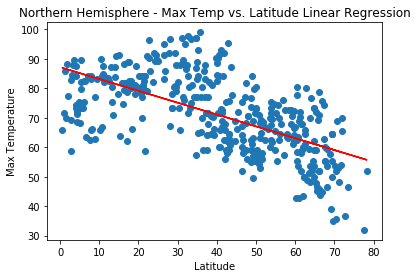

R Value = 0.37774973936437717


In [17]:
# Set labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plot(Northern_df["Lat"], Northern_df["Max Temp"], "Max Temp",(20,40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

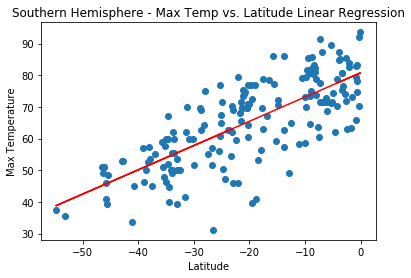

R Value = 0.5722257891579203


In [18]:
# Set labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#plot data
plot(Southern_df["Lat"], Southern_df["Max Temp"], "Max Temp",(-60,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

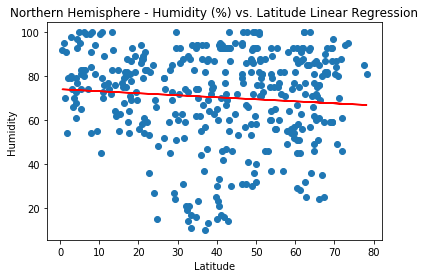

R Value = 0.00740098886141542


In [19]:
#Set labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#plot data
plot(Northern_df["Lat"], Northern_df["Humidity"], "Max Temp",(60,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

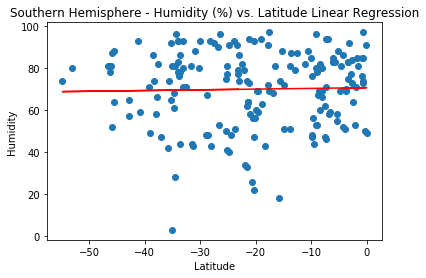

R Value = 0.0006691208066866198


In [20]:
#Set labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#plot data
plot(Southern_df["Lat"], Southern_df["Humidity"], "Max Temp",(-60,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

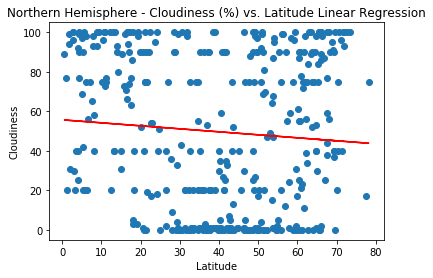

R Value = 0.006284505527943067


In [21]:
#Set labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#plot data
plot(Northern_df["Lat"], Northern_df["Cloudiness"], "Max Temp",(60,35))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

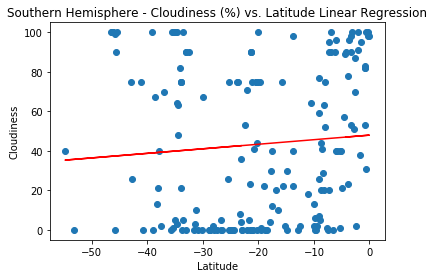

R Value = 0.006541245135699921


In [22]:
#Set labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#plot data
plot(Southern_df["Lat"], Southern_df["Cloudiness"], "Max Temp",(-60,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

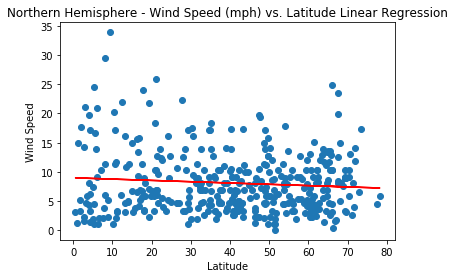

R Value = 0.0071956232286895586


In [23]:
#Set labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#plot data 
plot(Northern_df["Lat"], Northern_df["Wind Speed"], "Max Temp",(10,40))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

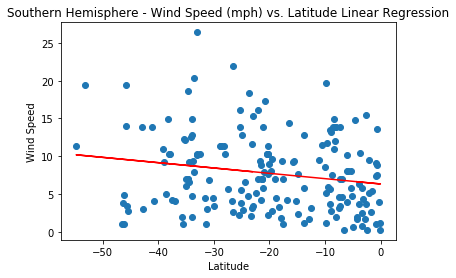

R Value = 0.03523409118570165


In [24]:
#Set labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#plot data 
plot(Southern_df["Lat"], Southern_df["Wind Speed"], "Max Temp",(-60,20))